In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

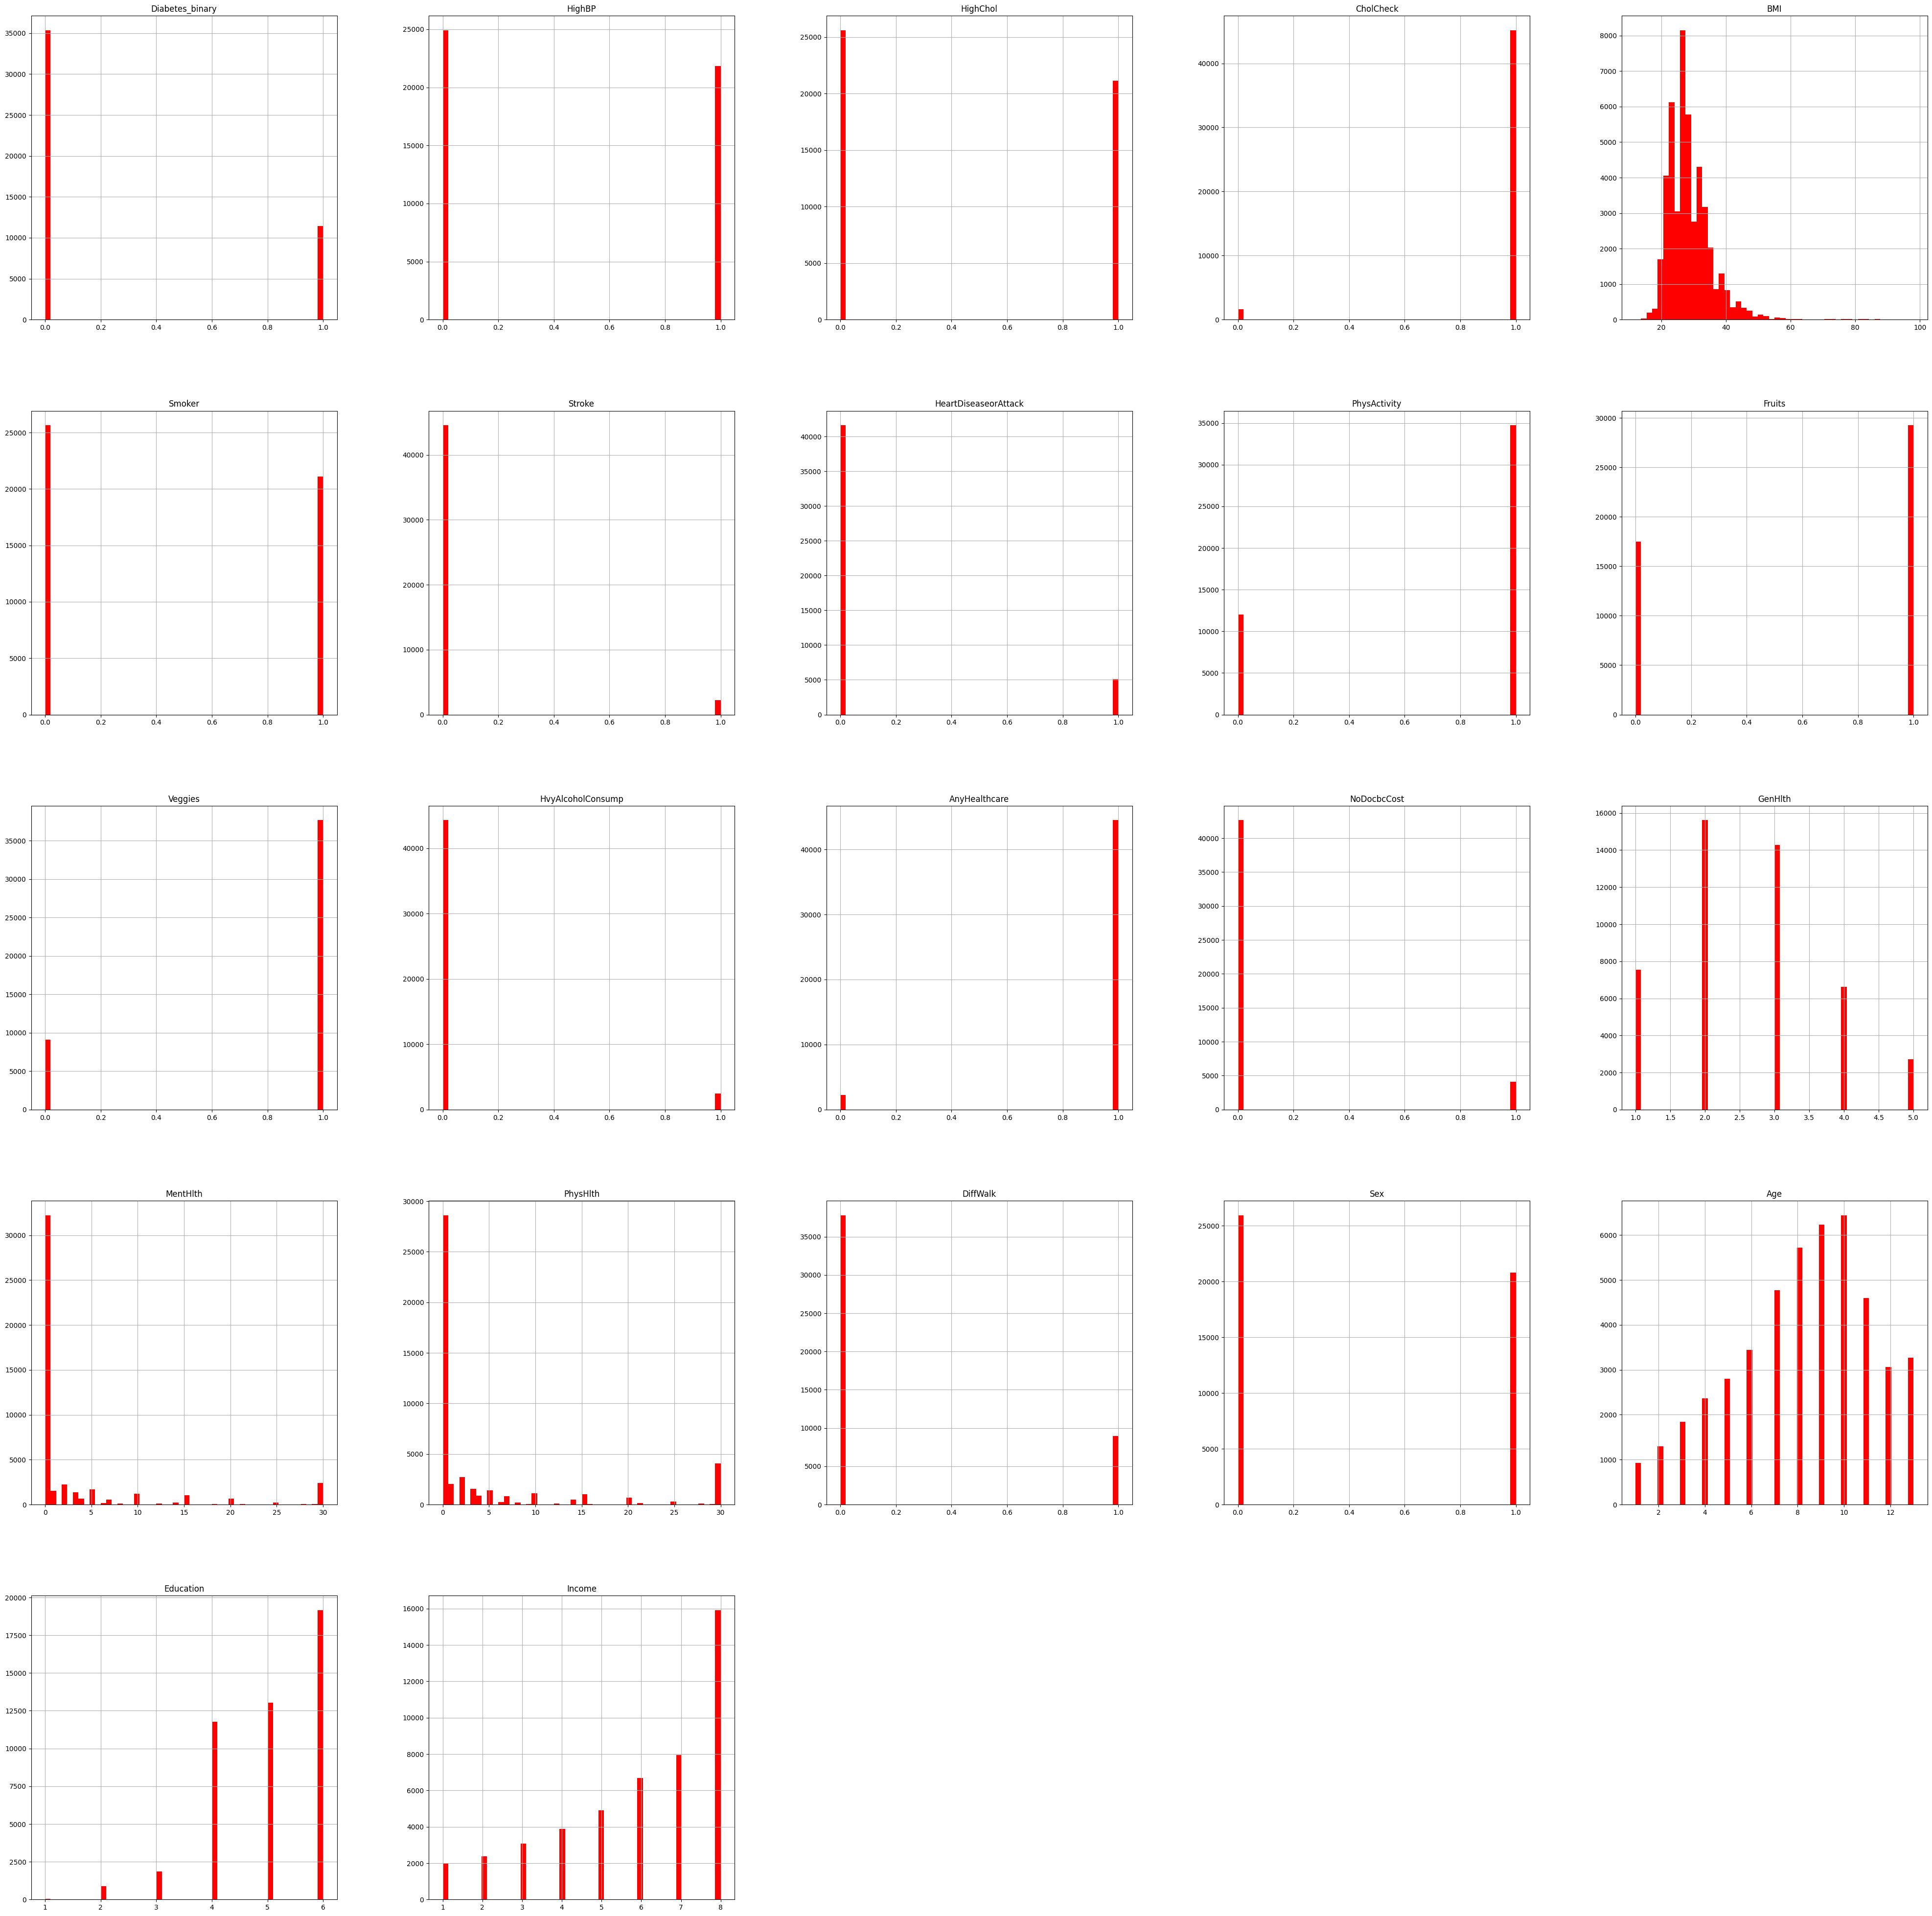

In [3]:
df.hist(figsize=(50,50), bins=50, color='red')

In [4]:
#PREDICTION
x = df[['BMI','HighBP']]
y = df['Diabetes_binary']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Matrix\n{conf_mat}")
print(f"Classification Report: \n{classification_rep}")

Accuracy: 0.7630960017104982
Matrix
[[6801  249]
 [1967  337]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      7050
         1.0       0.58      0.15      0.23      2304

    accuracy                           0.76      9354
   macro avg       0.68      0.56      0.55      9354
weighted avg       0.73      0.76      0.71      9354



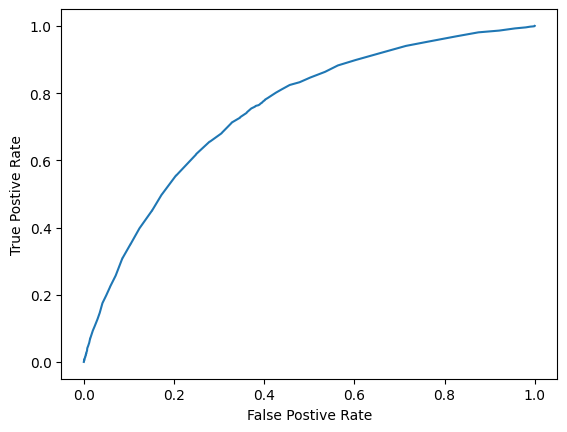

In [9]:
from sklearn import metrics
y_pred = model.predict_proba(x_test)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Postive Rate')
plt.xlabel('False Postive Rate')
plt.show()